# Cifar-10 이미지분류

In [ ]:
import numpy as np
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [ ]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [ ]:
X_train.shape, X_test.shape, y_train.shape
# 컬러, 50000 데이터 테스트는 1만

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

('frog', 'automobile', 'ship', 'horse')

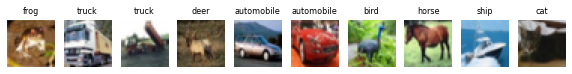

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i]), plt.axis('off')
    plt.title(class_names[y_train[i,0]], fontsize=8)
plt.show()

In [ ]:
# # X_data : 0~1 사이의 실수 (float32) 로 변환
# X_train = X_train/255.0
# X_test  = X_test/255.0

In [ ]:
# X_data : 0~1 사이의 실수 (float32) 로 변환
X_train = X_train.astype('float32') / 255.
X_test  = X_test.astype(np.float32) / 255.  # np.float32 의미 모르겠다.

In [ ]:
# y_data : One-hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((50000, 10), (10000, 10))

## 모델 정의 / 설정 / 학습 / 평가

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(32,32,3), activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    # 패딩층이 왜이리 많아?

    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        36928     
                                                      

In [ ]:
model.compile(
    optimizer = RMSprop(learning_rate=0.0001, decay=1e-6),
    loss= 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model_path = 'best-cifar10-v1.h5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
early_stop = EarlyStopping(patience=10)

In [ ]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2,
    epochs=100, batch_size=32, verbose=2,
    callbacks=[checkpoint, early_stop]
)

In [ ]:
best_model = load_model(MODEL_PATH)
best_model.evaluate(X_test,Y_test)
# 313/313 [==============================] - 1s 4ms/step - loss: 0.6715 - accuracy: 0.7818 원래 데이터  이건 샘과 같다. 
# [0.6714779734611511, 0.7817999720573425]
# 313/313 [==============================] - 2s 6ms/step - loss: 0.6716 - accuracy: 0.7845  
# [0.6715840101242065, 0.784500002861023] 다시돌린 데이터 ? 왜 다르지 아! 플로트 설정

313/313 [==============================] - 2s 6ms/step - loss: 0.6716 - accuracy: 0.7845


[0.6715840101242065, 0.784500002861023]

- 학습과정 시각화

In [ ]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

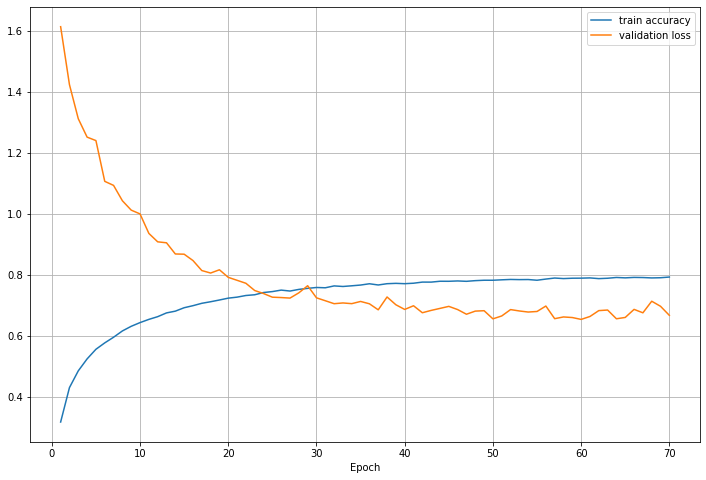

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()